<a href="https://colab.research.google.com/github/harperd17/cloud_classification/blob/main/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/harperd17/cloud_classification.git

Cloning into 'cloud_classification'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 171 (delta 38), reused 0 (delta 0), pack-reused 84
Receiving objects: 100% (171/171), 11.18 MiB | 8.66 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [3]:
!pip install torchsat
from torchsat.transforms import transforms_seg

     |████████████████████████████████| 46 kB 3.0 MB/s 


In [4]:
from google.colab import drive
import glob
import pandas as pd
from cloud_classification.helpers.helper_functions import CloudData, show_image_and_masks
import matplotlib.pyplot as plt

In [5]:
drive._mount('/content/drive/')

Mounted at /content/drive/


In [9]:
#%cd /content/drive/MyDrive/Data690/Project/Data
%cd /content/drive/Shareddrives/DavidHarper_Data690_Project/Data

/content/drive/MyDrive/Data690/Project/Data


In [10]:
train_im_names = glob.glob('train_images/**')
test_im_names = glob.glob('test_images/**')

In [11]:
print("There are {} train images.".format(len(train_im_names)))
print("There are {} test images.".format(len(test_im_names)))

There are 5546 train images.
There are 3703 test images.


In [ ]:
# this cell takes a LONG time to run. It opens up all the images and gets the size - I only did this so that I could confirm all the images are the same size

# train_shapes = [Image.open(im).size for im in train_im_names]
# test_shapes = [Image.open(im).size for im in test_im_names]
# # save the results and comment the cell out so I don't run it again
# train_shapes_df = pd.DataFrame({'File':train_im_names,'Size 1':np.array(train_shapes)[:,0],'Size 2':np.array(train_shapes)[:,1]})
# test_shapes_df = pd.DataFrame({'File':test_im_names,'Size 1':np.array(test_shapes)[:,0],'Size 2':np.array(test_shapes)[:,1]})
# train_shapes_df.to_csv('../train_shapes.csv')
# test_shapes_df.to_csv('../test_shapes.csv')

In [12]:
# read the shape dfs and print out the uniques sizes
train_shapes_df = pd.read_csv('../train_shapes.csv')
train_shapes_df['Shapes'] = train_shapes_df['Size 1'].astype(str) + ' ' + train_shapes_df['Size 2'].astype(str)
test_shapes_df = pd.read_csv('../test_shapes.csv')
test_shapes_df['Shapes'] = test_shapes_df['Size 1'].astype(str) + ' ' + test_shapes_df['Size 2'].astype(str)

print("Train Images have unique sizes of: {}".format(train_shapes_df['Shapes'].unique()))
print("Test Images have unique sizes of: {}".format(test_shapes_df['Shapes'].unique()))

Train Images have unique sizes of: ['2100 1400']
Test Images have unique sizes of: ['2100 1400']


All the images are 2100 x 1400 !! 

### Sample Image

In [13]:
# open up the train df which holds all the file names, labels, and pixel encoding information for the masks
train_data = pd.read_csv('train.csv')

In [14]:
# create a CloudData object which extends the Dataset class to load a sample image
#images_directory = '/content/drive/MyDrive/Data690/Project/Data'
images_directory = '/content/drive/Shareddrives/DavidHarper_Data690_Project/Data'
cloud_data_object = CloudData(data_directory = images_directory,
                              mask_df = train_data)

In [15]:
sample_images = [(cloud_data_object[i]) for i in range(15)]

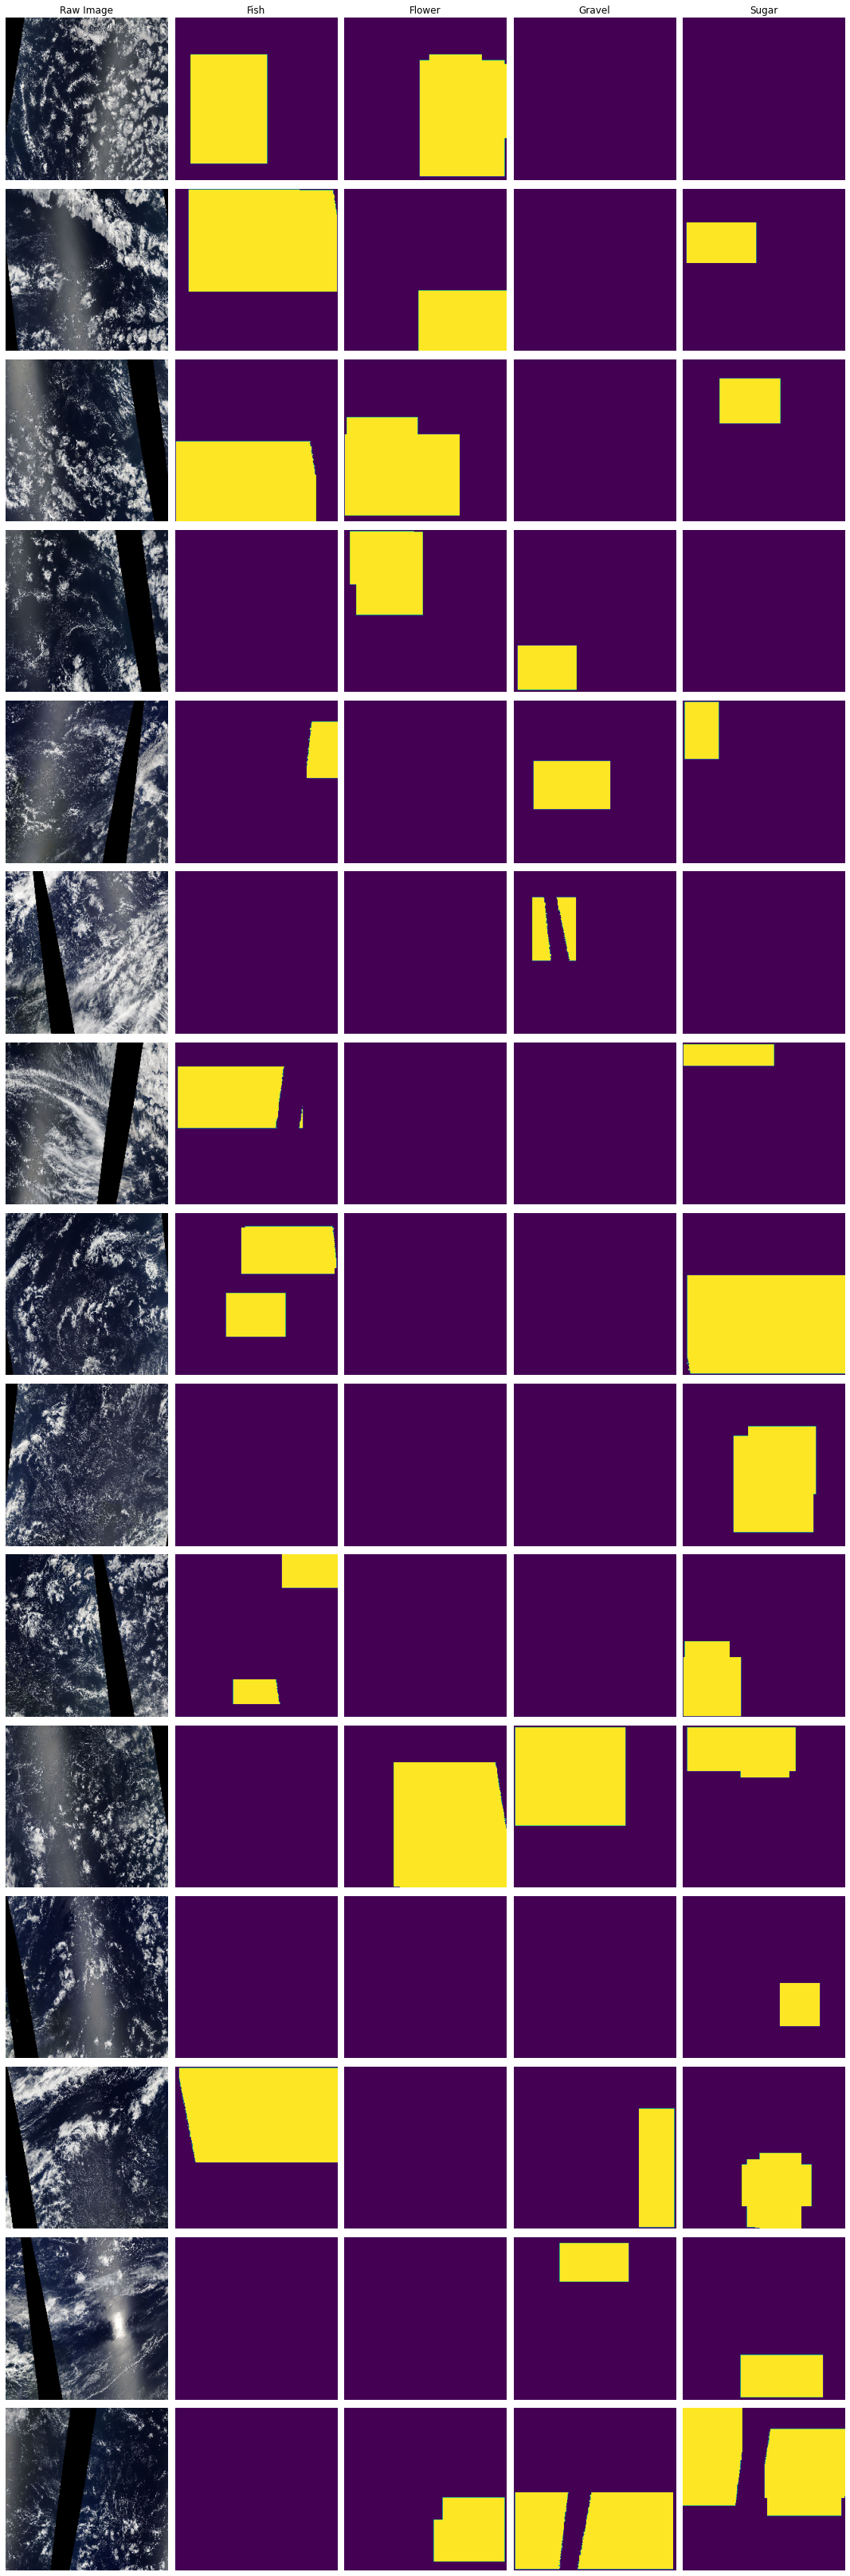

In [16]:
show_image_and_masks(sample_images, class_labels=cloud_data_object.classes);

# Look at Data Augmentation Techniques

Some basic augmentations I would like to do are:
1. random shift - so that the clouds are different areas of the image
2. random rotation - so that the clouds are different areas and also different orientations
3. random resized crop - so that the clouds can be different sizes - taking up a little bit of the image vs. taking up a lot of the image.
4. random flip - random vertical or horizontal flips to create more variety in the images
5. random brightness - some of the images have streaks of brightness. this transform might help the model become robust to these sorts of images.
6. random noise - add random pepper noise since there are some black specks in some of the images above. This should help the model become robust to these sorts of images.

In [17]:
transform_list = [transforms_seg.RandomShift(max_percent=0.15),
                  transforms_seg.RandomRotation(degrees=15),
                  #transforms_seg.RandomResizedCrop(crop_size=(128,128),target_size=(256,256)),
                  transforms_seg.RandomFlip(),
                  transforms_seg.RandomBrightness()
                  #transforms_seg.RandomNoise(mode='pepper',percent=0.005)
                  ]

In [18]:
cloud_data_object_transforms = CloudData(data_directory = images_directory,
                              mask_df = train_data,
                              transform=transform_list)

In [19]:
sample_images_transforms = [(cloud_data_object_transforms[i]) for i in range(15)]

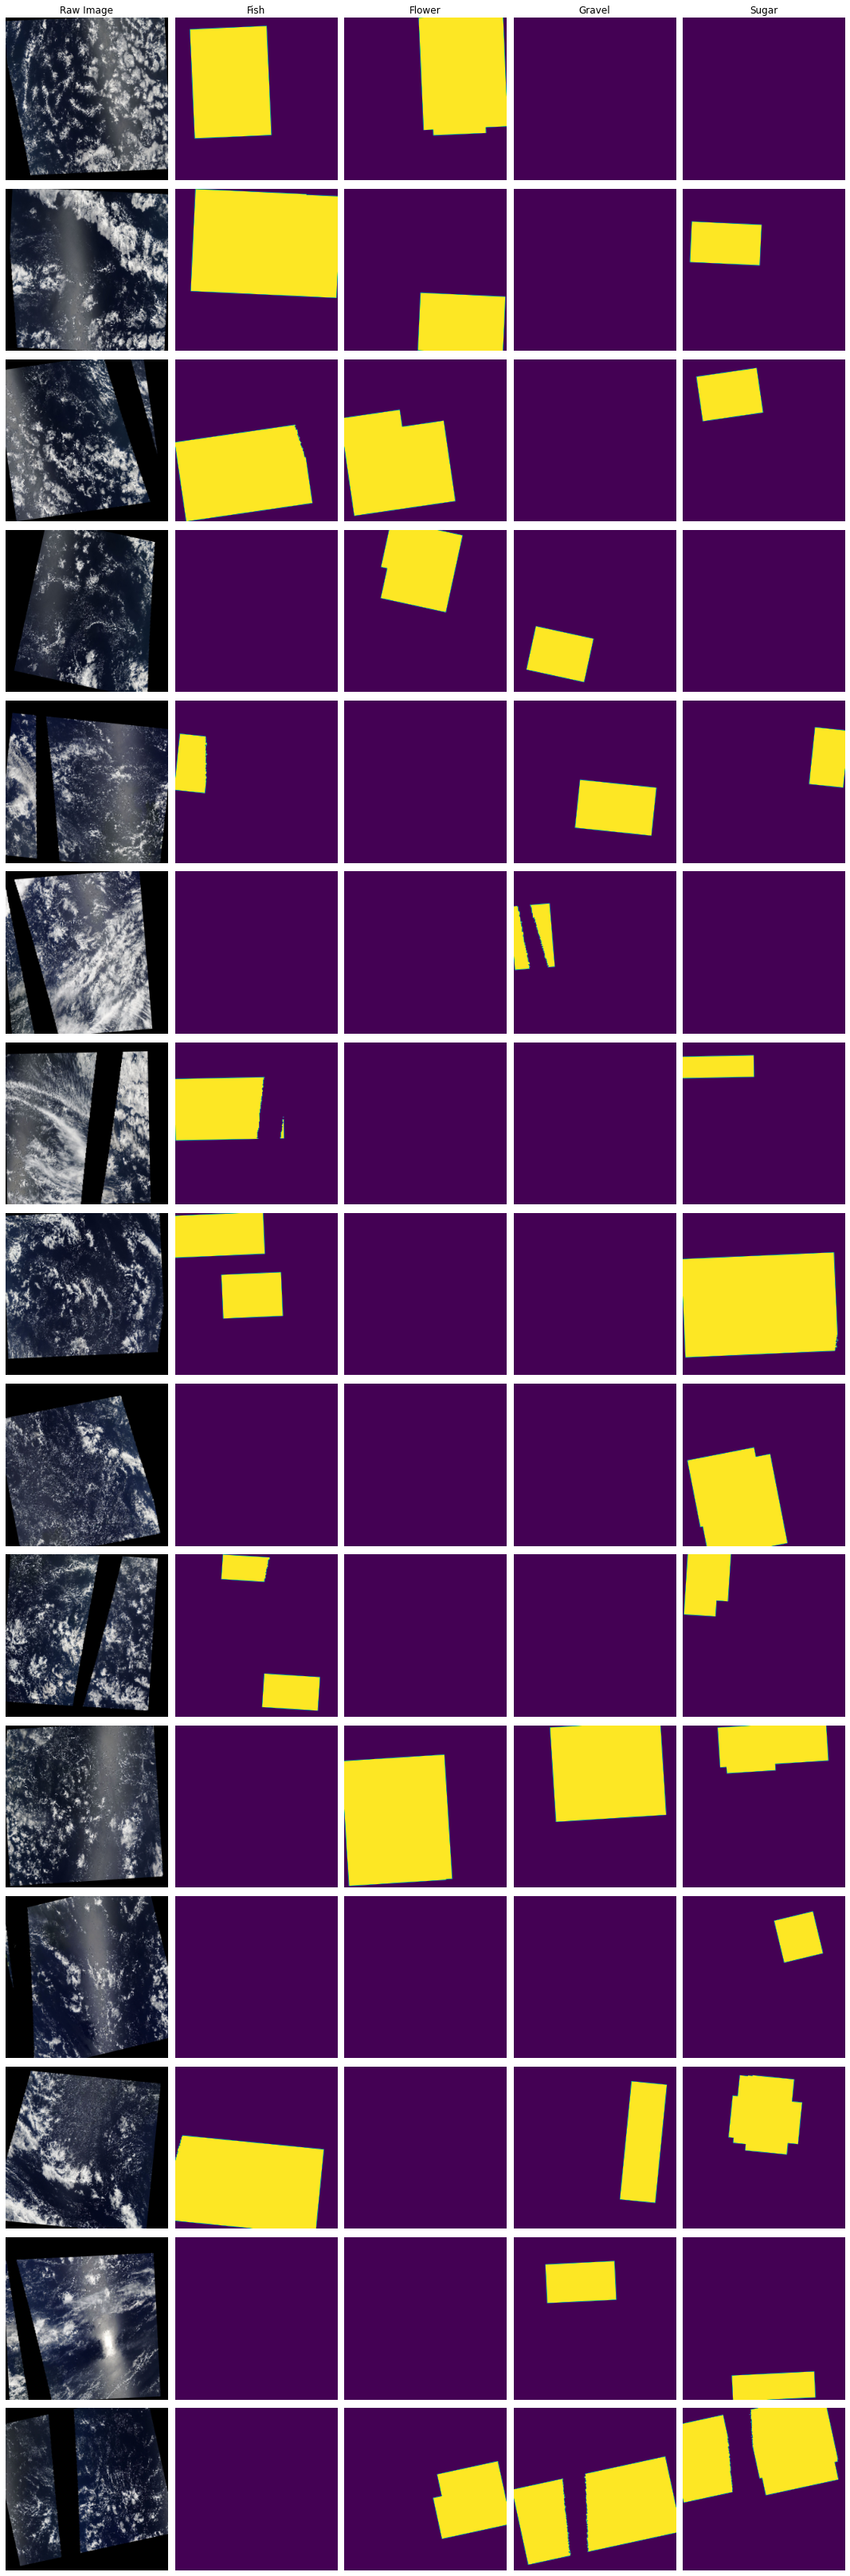

In [20]:
show_image_and_masks(sample_images_transforms, class_labels=cloud_data_object_transforms.classes);